### WeatherPy

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [87]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [88]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# # Just for testing use limited cities
# cities = [ "London", "Paris", "New York", "Darwin", "Bumblebazooooooooz"]
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold reponse info
temp = []
humidity = []
clouds = []
wind = []
date = []
country = []
newcity = []
newlat = []
newlng = []
count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        newcity.append(city)
        newlat.append(response['coord']['lat'])
        newlng.append(response['coord']['lon'])
        print(f'Processing Record {count}: | {city}')
        count += 1
    except:
        print(f'The city cannot be processed')
        pass


Processing Record 1: | banda aceh
Processing Record 2: | mataura
Processing Record 3: | busselton
Processing Record 4: | kaitangata
Processing Record 5: | college
Processing Record 6: | jamestown
Processing Record 7: | padang
Processing Record 8: | georgetown
Processing Record 9: | kuytun
Processing Record 10: | pacific grove
Processing Record 11: | lavrentiya
Processing Record 12: | kruisfontein
Processing Record 13: | cardoso
Processing Record 14: | vaini
Processing Record 15: | cabo san lucas
Processing Record 16: | punta arenas
Processing Record 17: | yulara
Processing Record 18: | tuktoyaktuk
Processing Record 19: | khatanga
The city cannot be processed
Processing Record 20: | port elizabeth
Processing Record 21: | providencia
Processing Record 22: | te anau
The city cannot be processed
Processing Record 23: | ushuaia
Processing Record 24: | kapaa
Processing Record 25: | juneau
Processing Record 26: | cairns
Processing Record 27: | gizo
The city cannot be processed
Processing Reco

Processing Record 229: | neryungri
The city cannot be processed
Processing Record 230: | parrita
Processing Record 231: | guerrero negro
Processing Record 232: | itaituba
Processing Record 233: | yuancheng
Processing Record 234: | lucani
Processing Record 235: | los llanos de aridane
Processing Record 236: | narathiwat
The city cannot be processed
The city cannot be processed
Processing Record 237: | novyy urengoy
Processing Record 238: | puerto penasco
Processing Record 239: | saint george
Processing Record 240: | matagami
Processing Record 241: | chateaubelair
Processing Record 242: | upington
The city cannot be processed
Processing Record 243: | vostok
Processing Record 244: | puerto ayora
Processing Record 245: | hualmay
Processing Record 246: | saquena
Processing Record 247: | zhanaozen
Processing Record 248: | sambava
Processing Record 249: | nanortalik
Processing Record 250: | tasiilaq
Processing Record 251: | rengali
Processing Record 252: | vanersborg
Processing Record 253: | 

Processing Record 444: | toora-khem
Processing Record 445: | mbala
Processing Record 446: | dubbo
Processing Record 447: | ucluelet
Processing Record 448: | itum-kale
Processing Record 449: | mandan
Processing Record 450: | pangnirtung
Processing Record 451: | raton
Processing Record 452: | qui nhon
Processing Record 453: | praia
Processing Record 454: | paita
Processing Record 455: | miracema
Processing Record 456: | caravelas
Processing Record 457: | eaton socon
Processing Record 458: | aberdeen
Processing Record 459: | barreirinhas
Processing Record 460: | san lawrenz
Processing Record 461: | harper
Processing Record 462: | saint-nazaire
Processing Record 463: | viedma
Processing Record 464: | ramygala
Processing Record 465: | victor harbor
The city cannot be processed
Processing Record 466: | charagua
Processing Record 467: | buta
Processing Record 468: | zabol
Processing Record 469: | mana
Processing Record 470: | trairi
Processing Record 471: | kuala terengganu
The city cannot be

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [89]:
# Create DataFrame
WeatherData = pd.DataFrame({"City": newcity,
                          "Cloudiness": clouds,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": newlat,
                          "Lng": newlng,
                          "Max_Temp": temp,
                          "Wind Speed": wind})

#Export as CSV
WeatherData.to_csv(output_data_file)

# Display DataFrame
WeatherData

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
0,banda aceh,100,ID,1608068985,81,5.56,95.32,298.80,2.75
1,mataura,44,NZ,1608068985,62,-46.19,168.86,292.59,2.68
2,busselton,0,AU,1608068985,81,-33.65,115.33,284.82,0.45
3,kaitangata,61,NZ,1608068985,48,-46.28,169.85,292.59,1.79
4,college,90,US,1608068985,71,64.86,-147.80,261.15,2.60
...,...,...,...,...,...,...,...,...,...
560,kiunga,100,PG,1608069032,97,-6.12,141.29,296.80,0.93
561,ahuimanu,75,US,1608069032,69,21.44,-157.84,301.15,4.60
562,hays,0,US,1608069032,62,30.05,-98.03,292.04,1.34
563,rongcheng,0,CN,1608069032,87,30.63,117.85,272.75,1.72


In [90]:
WeatherData.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,55.053097,1.608069e+09,75.435398,19.568726,19.710885,284.200690,3.801611
std,39.574922,6.591627e+01,18.413055,32.887426,90.540926,16.405345,2.742657
min,0.000000,1.608069e+09,9.000000,-54.800000,-175.200000,235.590000,0.110000
25%,11.000000,1.608069e+09,69.000000,-7.300000,-57.770000,272.750000,1.740000
50%,75.000000,1.608069e+09,78.000000,21.280000,20.140000,289.820000,3.100000
75%,91.000000,1.608069e+09,88.000000,47.280000,102.280000,298.150000,5.210000
max,100.000000,1.608069e+09,100.000000,78.220000,179.320000,308.240000,16.500000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [92]:
WeatherData = WeatherData[WeatherData["Humidity"] <= 100]
WeatherData.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,55.053097,1.608069e+09,75.435398,19.568726,19.710885,284.200690,3.801611
std,39.574922,6.591627e+01,18.413055,32.887426,90.540926,16.405345,2.742657
min,0.000000,1.608069e+09,9.000000,-54.800000,-175.200000,235.590000,0.110000
25%,11.000000,1.608069e+09,69.000000,-7.300000,-57.770000,272.750000,1.740000
50%,75.000000,1.608069e+09,78.000000,21.280000,20.140000,289.820000,3.100000
75%,91.000000,1.608069e+09,88.000000,47.280000,102.280000,298.150000,5.210000
max,100.000000,1.608069e+09,100.000000,78.220000,179.320000,308.240000,16.500000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

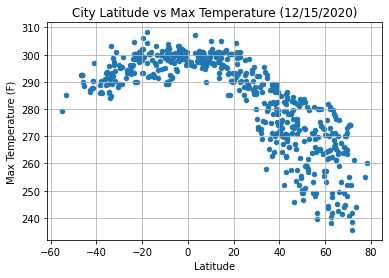

In [124]:
# Time code Unix...consider update
lattemp = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Max_Temp',title = "City Latitude vs Max Temperature (12/15/2020)", grid = True)
lattemp.set_xlabel("Latitude")
lattemp.set_ylabel("Max Temperature (F)")
plt.savefig("output_data/temp.png")
plt.show()
            

The code and plot above are analyzing the relationship between the location of cities and the temperature on a given date. The warmest temperatures are near the equator and the southern hemisphere while the coldest are in the northern hemisphere. This reflects the seasons of summer/winter in each hemisphere. 

## Latitude vs. Humidity Plot

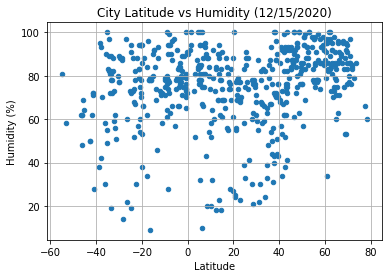

In [126]:
# Time code Unix...consider update
lathum = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Humidity',title = "City Latitude vs Humidity (12/15/2020)", grid = True)
lathum.set_xlabel("Latitude")
lathum.set_ylabel("Humidity (%)")
plt.savefig("output_data/humid.png")
plt.show()

The code and plot above are analyzing the relationship between the location of cities and the related humidities on a given date. There appears to be a fairly even distribution of humidity across city latitudes.

## Latitude vs. Cloudiness Plot

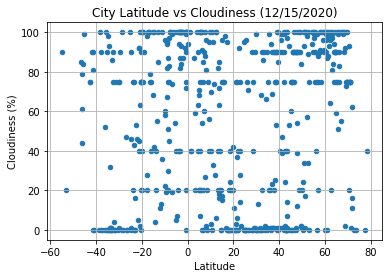

In [128]:
# Time code Unix...consider update
latclo = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Cloudiness',title = "City Latitude vs Cloudiness (12/15/2020)", grid = True)
latclo.set_xlabel("Latitude")
latclo.set_ylabel("Cloudiness (%)")
plt.savefig("output_data/cloud.png")
plt.show()

The code and plot above are analyzing the relationship between the location of cities and the related cloud coverage on a given date. There appears to be a fairly even distribution of cloudiness across city latitudes.

## Latitude vs. Wind Speed Plot


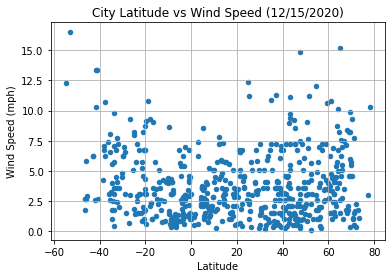

In [129]:
# Time code Unix...consider update
latwin = WeatherData.plot(kind="scatter", x = 'Lat', y = 'Wind Speed',title = "City Latitude vs Wind Speed (12/15/2020)", grid = True)
latwin.set_xlabel("Latitude")
latwin.set_ylabel("Wind Speed (mph)")
plt.savefig("output_data/wind.png")
plt.show()

The code and plot above are analyzing the relationship between the location of cities and the related wind speed on a given date. There appears to be a fairly even distribution of wind speed across city latitudes.

## Linear Regression

In [130]:
# Create Hemisphere DFs
north = WeatherData[WeatherData["Lat"] > 0]
south = WeatherData[WeatherData["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8365746716635325


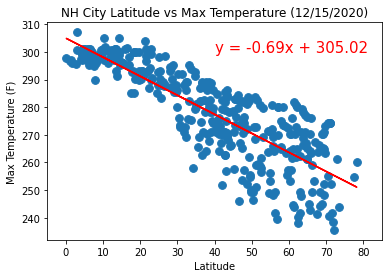

In [155]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
nlats = north["Lat"]
ntemps = north["Max_Temp"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlats,ntemps)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = nlats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(nlats,ntemps, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(nlats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(40,300),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("NH City Latitude vs Max Temperature (12/15/2020)")
# Set the limits of the plot
plt.xlim(-5,85)
# Save the plot image
plt.savefig("output_data/NHtemp.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(nlats,ntemps)[0]}')
# Display the plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6159611334862916


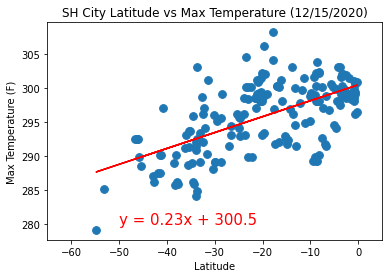

In [156]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
slats = south["Lat"]
stemps = south["Max_Temp"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slats,stemps)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = slats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(slats,stemps, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(slats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(-50,280),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("SH City Latitude vs Max Temperature (12/15/2020)")
# Set the limits of the plot
plt.xlim(-65,5)
# Save the plot image
plt.savefig("output_data/SHtemp.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(slats,stemps)[0]}')
# Display the plot
plt.show()

The above two plots show that there is a correlation between latitude and temperature. The further away from the equator in either hemisphere, the cooler the temperatures are, though the correlation is stronger in the northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2761431591918134


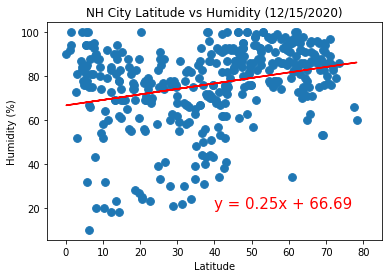

In [157]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
nhum = north["Humidity"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlats,nhum)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = nlats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(nlats,nhum, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(nlats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("NH City Latitude vs Humidity (12/15/2020)")
# Set the limits of the plot
plt.xlim(-5,85)
# Save the plot image
plt.savefig("output_data/NHhumid.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(nlats,nhum)[0]}')
# Display the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.253336178644851


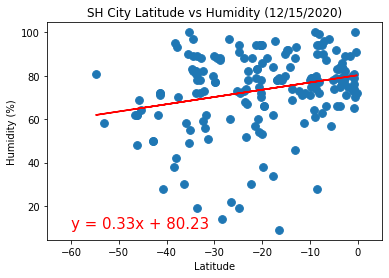

In [158]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
shum = south["Humidity"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slats,shum)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = slats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(slats,shum, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(slats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("SH City Latitude vs Humidity (12/15/2020)")
# Set the limits of the plot
plt.xlim(-65,5)
# Save the plot image
plt.savefig("output_data/SHhumid.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(slats,shum)[0]}')
# Display the plot
plt.show()

The above scatter plots confirm that there is not a strong correlation between latitude and humidity regardless of hemisphere distinction.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.2567718268476423


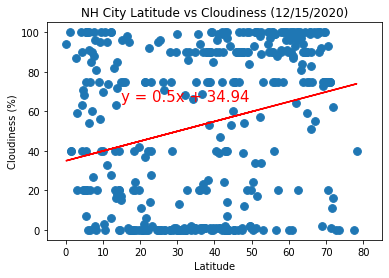

In [159]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
nclo = north["Cloudiness"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlats,nclo)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = nlats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(nlats,nclo, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(nlats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(15,65),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("NH City Latitude vs Cloudiness (12/15/2020)")
# Set the limits of the plot
plt.xlim(-5,85)
# Save the plot image
plt.savefig("output_data/NHcloud.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(nlats,nclo)[0]}')
# Display the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3014432023919025


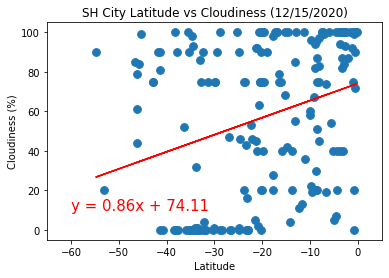

In [153]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
sclo = south["Cloudiness"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slats,sclo)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = slats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(slats,sclo, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(slats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("SH City Latitude vs Cloudiness (12/15/2020)")
# Set the limits of the plot
plt.xlim(-65,5)
# Save the plot image
plt.savefig("output_data/SHcloud.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(slats,sclo)[0]}')
# Display the plot
plt.show()

The above scatter plots confirm that there is not a strong correlation between latitude and cloudiness regardless of hemisphere distinction.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15745733219931157


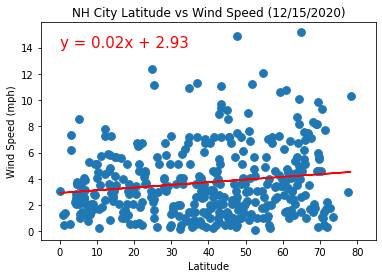

In [160]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
nwin = north["Wind Speed"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlats,nwin)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = nlats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(nlats,nwin, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(nlats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("NH City Latitude vs Wind Speed (12/15/2020)")
# Set the limits of the plot
plt.xlim(-5,85)
# Save the plot image
plt.savefig("output_data/NHwind.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(nlats,nwin)[0]}')
# Display the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: -0.41024327816860157


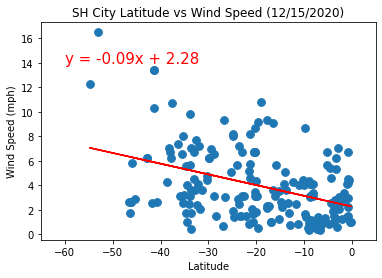

In [161]:
# Using the Grouped DF above, create variables to be used in correlation and as axes in plotting
swin = south["Wind Speed"]
# Using the linregress module from Scipy Stats, assign values to variables related to linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slats,swin)
# Create variable for the formula serving as y=mx+b for the linear regression
regress_values = slats * slope + intercept
# Create variable for the text to explain the y=mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(slats,swin, s = 60)
# Plot the line "regress_values" to visually represent the linear regression
plt.plot(slats,regress_values,"r-")
# Plot the formula of the line in text
plt.annotate(line_eq,(-60,14),fontsize=15,color="red")
# Plot the labels for axes/title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("SH City Latitude vs Wind Speed (12/15/2020)")
# Set the limits of the plot
plt.xlim(-65,5)
# Save the plot image
plt.savefig("output_data/SHwind.png")
# Print the r-value to find correlation
print(f'The r-value is: {st.pearsonr(slats,swin)[0]}')
# Display the plot
plt.show()

The above plots show that there is a difference in correlation between wind speed and latitude by hemisphere. There is little correlation in the northern hemisphere and wind speeds are distributed evenly. While there isn't a perfect correlation in the southern hemisphere, there is a stronger correlation, with wind speeds increasing the farther south of the equator the latitude is.